In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
pd.options.display.max_columns = None
import warnings
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import norm
warnings.filterwarnings('ignore')

# Data Understanding

In [2]:
#loading Dataset
df = pd.read_csv('wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [3]:
df.shape

(7500, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [5]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [6]:
round(100*(df.isnull().sum()/df.shape[0]), 2)


winery          0.00
wine            0.00
year            0.03
rating          0.00
num_reviews     0.00
country         0.00
region          0.00
price           0.00
type            7.27
body           15.59
acidity        15.59
dtype: float64

# Data Preprocessing

In [7]:
#lets first drop all null values
df=df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6329 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6329 non-null   object 
 1   wine         6329 non-null   object 
 2   year         6329 non-null   object 
 3   rating       6329 non-null   float64
 4   num_reviews  6329 non-null   int64  
 5   country      6329 non-null   object 
 6   region       6329 non-null   object 
 7   price        6329 non-null   float64
 8   type         6329 non-null   object 
 9   body         6329 non-null   float64
 10  acidity      6329 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 593.3+ KB


In [9]:
#Now as we see above in year column we have one unique value as "N.V." lets replace it with nan and drop
#it with dropna 
df["year"]=df["year"].replace("N.V.",np.NaN)
df=df.dropna()
df['year'] = df['year'].astype(np.int64)
print(df.year.unique())

[2013 2018 2009 1999 1996 1998 2010 1995 2015 2011 2016 1970 1946 1962
 2019 2004 1931 1979 2005 2020 2014 1985 1929 2007 2012 2017 2008 2006
 2000 2003 2002 1991 1994 1990 1989 1987 1986 1981 2001 1968 1964 1982
 1974 1983 1955 1980 1972 1953 1958 1942 1965 1992 1973 1997 1967 1975
 1910 1961 1954 1988 1969 1951 1928 1976 1949 2021 1959 1922 1978 1925]


In [10]:
#Country column is not important so lets drop it
df=df.drop("country",axis=1)
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [11]:
from sklearn.preprocessing import LabelEncoder

print("categorical Variables:")
for col in df.columns:
    if df[col].dtype=="object":
        print(str(col))
        label=LabelEncoder()
        label=label.fit(df[col])
        df[col]=label.transform(df[col].astype(str))

categorical Variables:
winery
wine
region
type


**We have converted everything into numerical features now are standardizing our data**

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the DataFrame
df_standardized = scaler.fit_transform(df)

# Convert the result back to a DataFrame (optional)
df_std = pd.DataFrame(df_standardized, columns=df.columns)
df_std.head()


,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,1.281121,1.291830,0.006272,5.114491,-0.631490,1.143504,5.604802,2.208510,1.407978,0.217748
1,-1.766811,1.546527,0.706096,5.114491,-0.676116,1.355644,1.487011,1.932849,-0.275715,-3.899793
2,1.493318,1.374883,-0.553587,4.315208,2.236173,0.294945,1.556195,0.003224,1.407978,0.217748
3,1.493318,1.374883,-1.953235,4.315208,2.090724,0.294945,3.779802,0.003224,1.407978,0.217748
4,1.493318,1.374883,-2.373129,4.315208,1.436203,0.294945,4.293997,0.003224,1.407978,0.217748


# Data Visualization

In [13]:
from tabulate import tabulate
def calculate_statistical_moments(df):
    """
    Calculate statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - df (DataFrame): Input DataFrame containing features.

    Returns:
    - DataFrame: DataFrame containing statistical moments for each feature.
    """
    moments = {
        'Mean': df.mean(),
        'Median': df.median(),
        'Standard Deviation': df.std(),
        'Skewness': df.skew(),
        'Kurtosis': df.kurtosis()
    }
    return pd.DataFrame(moments)

def display_statistical_moments(df):
    """
    Display statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - df (DataFrame): Input DataFrame containing features.
    """
    moments_df = calculate_statistical_moments(df)
    print("\nStatistical Moments:\n")
    print(tabulate(moments_df, headers='keys', tablefmt='grid', showindex=True, numalign="center", stralign='center'))

display_statistical_moments(df)


Statistical Moments:

+-------------+---------+----------+----------------------+------------+------------+
|             |  Mean   |  Median  |  Standard Deviation  |  Skewness  |  Kurtosis  |
+=============+=========+==========+======================+============+============+
|   winery    | 211.177 |   214    |       103.685        |  -0.13069  |  -1.00676  |
+-------------+---------+----------+----------------------+------------+------------+
|    wine     | 373.687 |   395    |       180.621        | -0.180103  |  -1.21836  |
+-------------+---------+----------+----------------------+------------+------------+
|    year     | 2012.96 |   2015   |       7.14524        |  -5.15863  |   43.225   |
+-------------+---------+----------+----------------------+------------+------------+
|   rating    | 4.26012 |   4.2    |       0.125122       |  2.28575   |   4.6952   |
+-------------+---------+----------+----------------------+------------+------------+
| num_reviews | 440.065 |   402

In [14]:
df2=df.drop(["winery","wine","region","type"],axis=1)
df2.head()

,year,rating,num_reviews,price,body,acidity
0,2013,4.9,58,995.00,5.0,3.0
1,2018,4.9,31,313.50,4.0,2.0
2,2009,4.8,1793,324.95,5.0,3.0
3,1999,4.8,1705,692.96,5.0,3.0
4,1996,4.8,1309,778.06,5.0,3.0


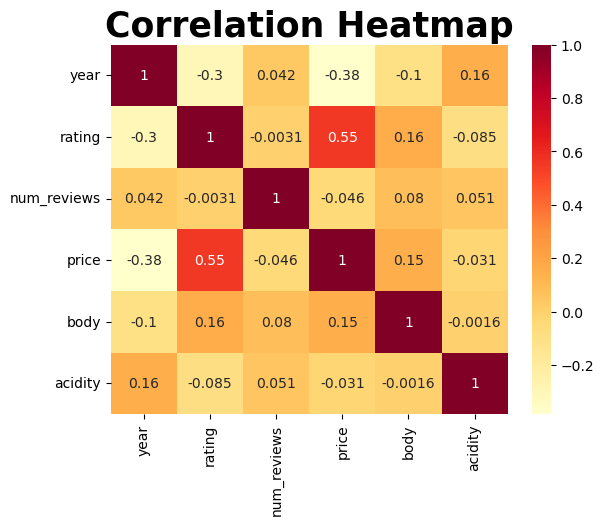

In [15]:
sns.heatmap(df2.corr(), annot=True, cmap="YlOrRd")

# Set title
plt.title('Correlation Heatmap', fontsize=25, fontweight='bold')

plt.show()

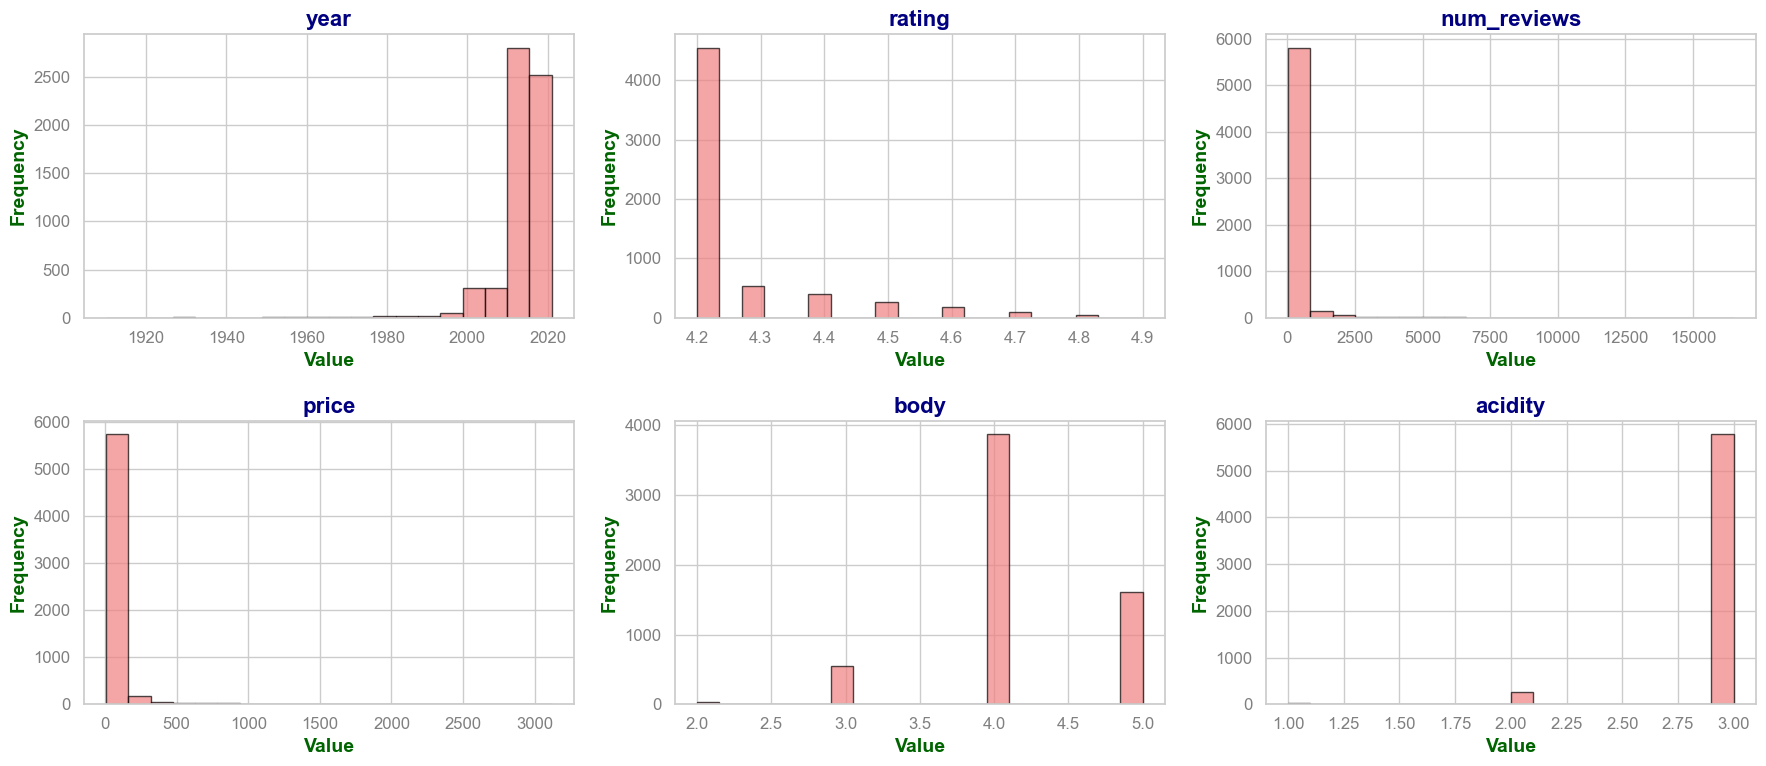

In [16]:
def plot_histograms(data):
    """
    Plot histograms of features to view data distribution.

    Parameters:
    - data (DataFrame): Input data
    """
    # Set style
    sns.set(style='whitegrid', font_scale=1.5)

    # Calculate number of rows and columns for subplots
    num_cols = len(data.columns)
    num_rows = (num_cols + 2) // 3  # Ensure at least 3 columns per row

    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 4 * num_rows))

    # Flatten axes for easy iteration
    ax_flat = axes.flatten()

    # Plot histograms for each feature
    for i, col in enumerate(data.columns):
        ax = ax_flat[i]
        ax.hist(data[col], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
        ax.set_title(col, fontsize=16, fontweight='bold', color='navy')
        ax.set_xlabel('Value', fontsize=14, fontweight='bold', color='darkgreen')
        ax.set_ylabel('Frequency', fontsize=14, fontweight='bold', color='darkgreen')
        ax.tick_params(axis='both', which='major', labelsize=12, colors='gray')

    # Hide unused subplots
    for j in range(num_cols, num_rows * 3):
        fig.delaxes(ax_flat[j])

    plt.tight_layout()
    plt.show()

# Example usage
plot_histograms(df2)

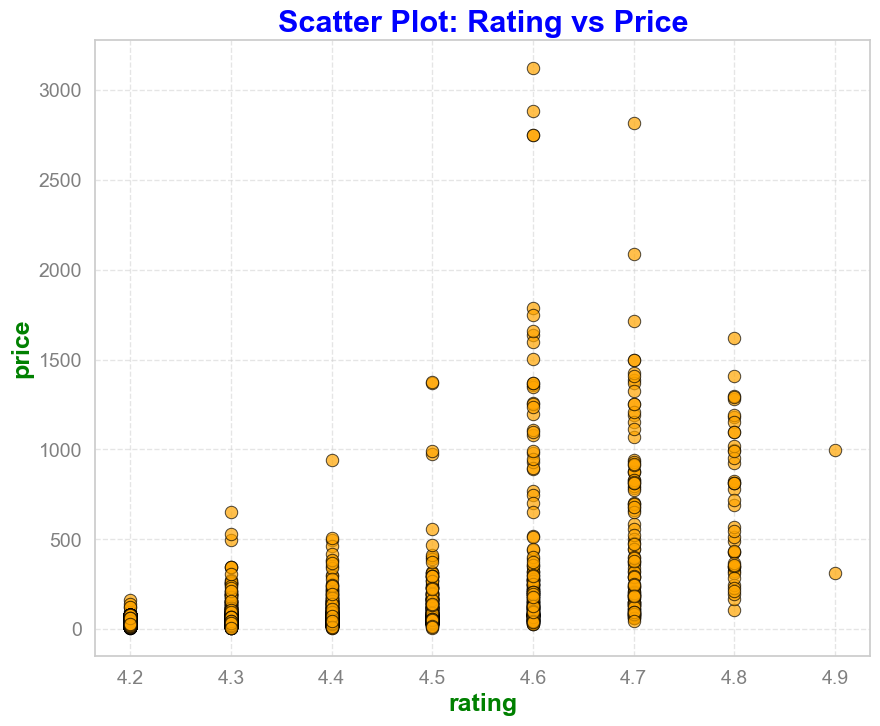

In [17]:

def plot_features(data, feature1, feature2, title):
    """
    Plot two features from a DataFrame in a stylish manner.

    Parameters:
    - data (DataFrame): Input DataFrame containing features.
    - feature1 (str): Name of the first feature (x-axis).
    - feature2 (str): Name of the second feature (y-axis).
    - title (str): Title of the plot.
    """
    # Set style
    sns.set(style='whitegrid', font_scale=1.5)
    
    # Create scatter plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=feature1, y=feature2, data=data, color='orange', edgecolor='black', alpha=0.7, s=80)
    
    # Set title and labels
    plt.title(title, fontsize=22, fontweight='bold', color='blue')
    plt.xlabel(feature1, fontsize=18, fontweight='bold', color='green')
    plt.ylabel(feature2, fontsize=18, fontweight='bold', color='green')
    
    # Increase tick label font size and color
    plt.xticks(fontsize=14, color='gray')
    plt.yticks(fontsize=14, color='gray')
    
    # Add grid with dashed lines
    plt.grid(True, linestyle='--', linewidth=1, alpha=0.5)
    
    plt.show()

# Example usage
plot_features(df2, 'rating', 'price', 'Scatter Plot: Rating vs Price')

# Model Building

In [18]:
X=df_std.drop("price",axis=1)
y=df_std[["price"]]
y = y.values.ravel()


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


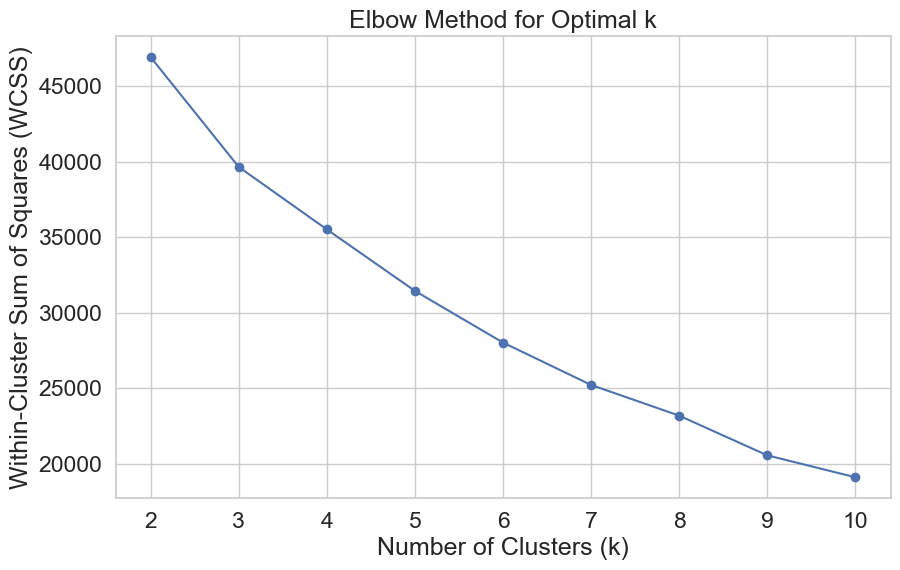

In [20]:
# Initialize lists to store inertia values
inertia_values = []

# Test different values of k (number of clusters)
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    # Create KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

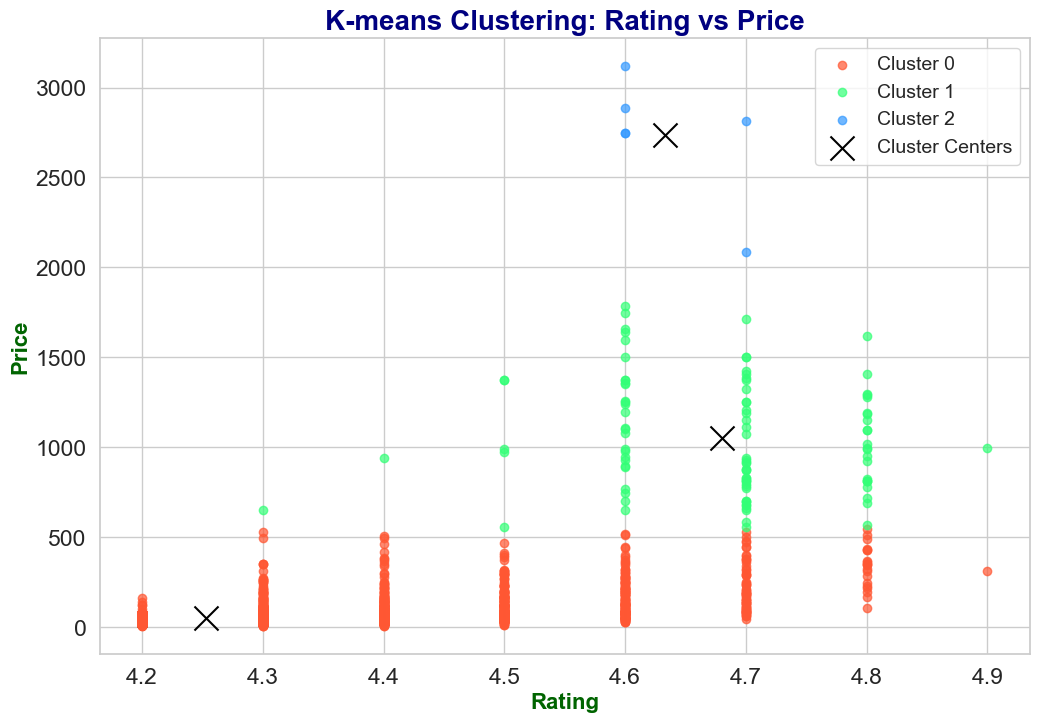

In [21]:
# Define the clusters with new feature names
km = KMeans(n_clusters=3, random_state=42)  # Specify the number of clusters
df['cluster'] = km.fit_predict(df[['rating', 'price']])  # Fit K-means and assign cluster labels

# Set custom colors for clusters
colors = ['#FF5733', '#33FF77', '#3399FF']  # You can add more colors if needed

# Plot clusters with cluster centers
plt.figure(figsize=(12, 8))

# Plot each cluster using a different color
for cluster_label, color in zip(sorted(df['cluster'].unique()), colors):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['rating'], cluster_data['price'], label=f'Cluster {cluster_label}', alpha=0.7, color=color)

# Plot cluster centers
cluster_centers = km.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=300, c='black', label='Cluster Centers')

# Set plot title and labels
plt.title('K-means Clustering: Rating vs Price', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('Rating', fontsize=16, fontweight='bold', color='darkgreen')
plt.ylabel('Price', fontsize=16, fontweight='bold', color='darkgreen')

# Add legend
plt.legend(fontsize=14)
plt.grid(True)

plt.show()


In [22]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6070 entries, 0 to 6069
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6070 non-null   float64
 1   wine         6070 non-null   float64
 2   year         6070 non-null   float64
 3   rating       6070 non-null   float64
 4   num_reviews  6070 non-null   float64
 5   region       6070 non-null   float64
 6   price        6070 non-null   float64
 7   type         6070 non-null   float64
 8   body         6070 non-null   float64
 9   acidity      6070 non-null   float64
dtypes: float64(10)
memory usage: 474.3 KB


In [23]:
print(X.shape)
print(y.shape)

(6070, 9)
(6070,)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def train_regression_models(X_train, X_test, y_train, y_test):
    # Hyperparameter tuning for RandomForestRegressor
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_rf_model = grid_search.best_estimator_

    # Fit and evaluate the best model
    best_rf_model.fit(X_train, y_train)
    y_pred = best_rf_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return y_pred, mse, r2

# Example usage
y_pred, mse, r2 = train_regression_models(X_train, X_test, y_train, y_test)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.4081653649200751
R-squared: 0.638473202263006


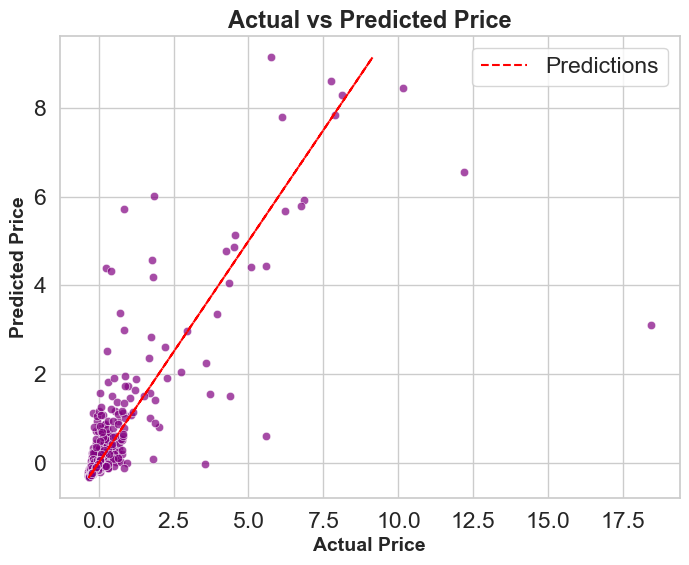

In [25]:
# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.7)
plt.plot(y_pred, y_pred, color='red', linestyle='--', label='Predictions')  # Plot the diagonal line for perfect predictions
plt.title('Actual vs Predicted Price', fontsize=17, fontweight='bold')
plt.xlabel('Actual Price', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=14, fontweight='bold')
plt.legend()
plt.show()